In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,  mean_absolute_error, r2_score
import joblib
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [13]:
# Load dataset
data = pd.read_csv("data.csv")

In [14]:
data.dtypes

Region                          object
Elevation                        int64
Slope                          float64
Aspect                         float64
Soil Type                       object
Land Cover                      object
Avg Annual Temp                float64
Avg Annual Precip                int64
GDD                              int64
Seasonal Precip Variability    float64
Solar Radiation                float64
Wind Speed                     float64
Humidity                       float64
Suitability Index              float64
dtype: object

In [15]:
data.head()

,Region,Elevation,Slope,Aspect,Soil Type,Land Cover,Avg Annual Temp,Avg Annual Precip,GDD,Seasonal Precip Variability,Solar Radiation,Wind Speed,Humidity,Suitability Index
0,Eastern Europe,1770,24.133132,239.992919,Clay,Grassland,30.199769,1689,1600,33.578859,28.472441,2.257167,85.321458,0.4
1,Eastern Europe,1747,13.225003,245.023929,Loam,Forest,33.537835,1936,795,20.197549,13.255971,3.315910,55.873389,0.4
2,Eastern Europe,2237,1.320166,186.757707,Sandy,Grassland,31.883695,1826,1981,21.713319,24.107763,5.150075,84.893515,0.4
3,Eastern Europe,1892,3.972007,304.427289,Sandy,Grassland,11.955604,1454,1294,21.933796,14.547973,2.883853,52.894027,0.6
4,Western Europe,164,9.237376,225.578395,Sandy,Grassland,4.931915,1740,1186,44.923621,23.717215,5.994257,72.730396,0.6


In [16]:
data.describe()

,Elevation,Slope,Aspect,Avg Annual Temp,Avg Annual Precip,GDD,Seasonal Precip Variability,Solar Radiation,Wind Speed,Humidity,Suitability Index
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1303.432000,14.834951,179.082213,14.596029,1086.256000,1242.632000,34.668652,19.823738,3.601643,69.790989,0.583400
std,684.844886,8.854527,104.240597,11.583992,509.018544,435.345422,8.587750,5.821417,2.058117,11.283675,0.128767
min,104.000000,0.002485,0.241412,-4.968222,200.000000,500.000000,20.018428,10.018417,0.005813,50.035106,0.400000
25%,734.000000,6.612138,91.735794,4.490511,660.250000,858.500000,27.560359,14.777944,1.864712,60.184918,0.400000
50%,1281.000000,15.398618,175.503215,14.110305,1052.500000,1248.000000,34.495033,19.729289,3.584234,69.858861,0.600000
75%,1909.250000,22.465826,270.870674,24.791329,1515.250000,1641.000000,42.139635,24.833626,5.486721,79.000596,0.600000
max,2499.000000,29.972053,359.660270,34.988469,1998.000000,1998.000000,49.987603,29.984788,6.998346,89.977460,0.800000


In [17]:
# Define features and target
X = data.drop(columns=['Suitability Index'])
y = data['Suitability Index']

In [18]:
# Define categorical and numerical columns
categorical_cols = ['Region', 'Soil Type', 'Land Cover']
numerical_cols = ['Elevation', 'Slope', 'Aspect', 'Avg Annual Temp', 
                  'Avg Annual Precip', 'GDD', 'Seasonal Precip Variability', 
                  'Solar Radiation', 'Wind Speed', 'Humidity']


In [19]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

In [20]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# List of algorithms
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Support Vector Regression (SVR)': SVR(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    # Hybrid Model: Combining Gradient Boosting and Linear Regression
    'Hybrid Model': VotingRegressor(
        estimators=[
            ('gb', GradientBoostingRegressor(random_state=42)),
            ('lr', LinearRegression())
        ]
    )
}


In [22]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Train the pipeline
    model_pipeline.fit(X_train, y_train)
    
    # Predict and store predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate the model
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results and predictions
    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2,
        'y_pred': y_pred  # Save predictions for visualization
    }
    print(f"Model: {name}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R2 Score: {r2}")
    print("======================================")

# Display results summary
print("\nSummary of Results:")
for name, metrics in results.items():
    print(f"{name}: RMSE = {metrics['RMSE']:.4f}, MAE = {metrics['MAE']:.4f}, R2 = {metrics['R2 Score']:.4f}")


Model: Random Forest
  RMSE: 0.003544009029333845
  MAE: 0.0006400000000010003
  R2 Score: 0.9992294478527608
Model: Gradient Boosting
  RMSE: 0.0027225586824972934
  MAE: 0.0010127599776120389
  R2 Score: 0.9995452560871385
Model: AdaBoost
  RMSE: 0.03798201298311231
  MAE: 0.0148618421052655
  R2 Score: 0.91149488894176
Model: Linear Regression
  RMSE: 0.10674115942009631
  MAE: 0.08556262932243822
  R2 Score: 0.3010015267272139
Model: Ridge Regression
  RMSE: 0.10675145315964674
  MAE: 0.08556015988696437
  R2 Score: 0.3008667023499232
Model: Lasso Regression
  RMSE: 0.12793772899344433
  MAE: 0.091855
  R2 Score: -0.004175613496932629
Model: Support Vector Regression (SVR)
  RMSE: 0.100817279403019
  MAE: 0.08357169281062493
  R2 Score: 0.37643412109040475
Model: Decision Tree
  RMSE: 2.953018463679809e-15
  MAE: 2.2407076194497223e-15
  R2 Score: 1.0
Model: Hybrid Model
  RMSE: 0.05351622038909364
  MAE: 0.042830814044814744
  R2 Score: 0.8242953469488318

Summary of Results:
Rand

In [23]:
# Train, evaluate, and save specific models
for name, model in models.items():
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Train the pipeline
    model_pipeline.fit(X_train, y_train)
    
    # Print the model name to ensure correct matching
    print(f"Training model: {name}")
    
    # Save specific models
    if name in ['Gradient Boosting', 'Hybrid Model', 'AdaBoost', 'Random Forest']:
        print(f"Saving {name} model...")
        joblib.dump(model_pipeline, f"{name.replace(' ', '_').lower()}_model_pipeline.pkl")


Training model: Random Forest
Saving Random Forest model...
Training model: Gradient Boosting
Saving Gradient Boosting model...
Training model: AdaBoost
Saving AdaBoost model...
Training model: Linear Regression
Training model: Ridge Regression
Training model: Lasso Regression
Training model: Support Vector Regression (SVR)
Training model: Decision Tree
Training model: Hybrid Model
Saving Hybrid Model model...


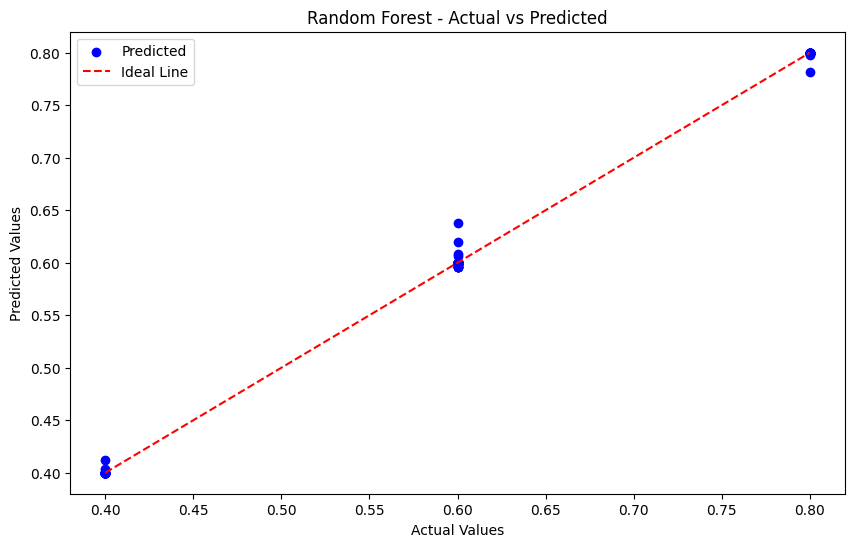

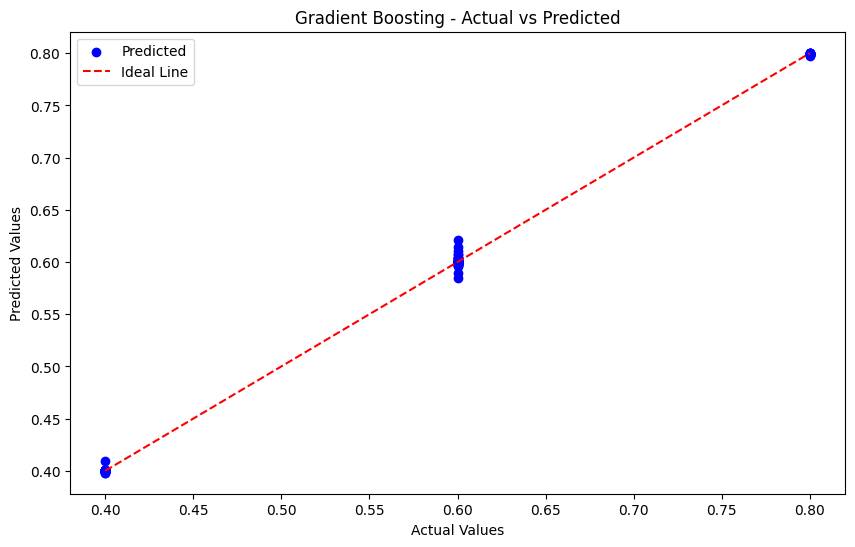

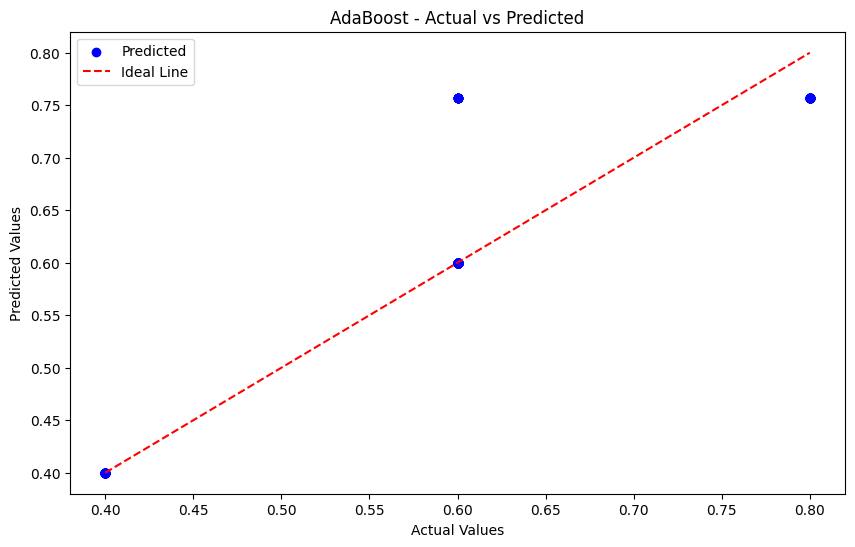

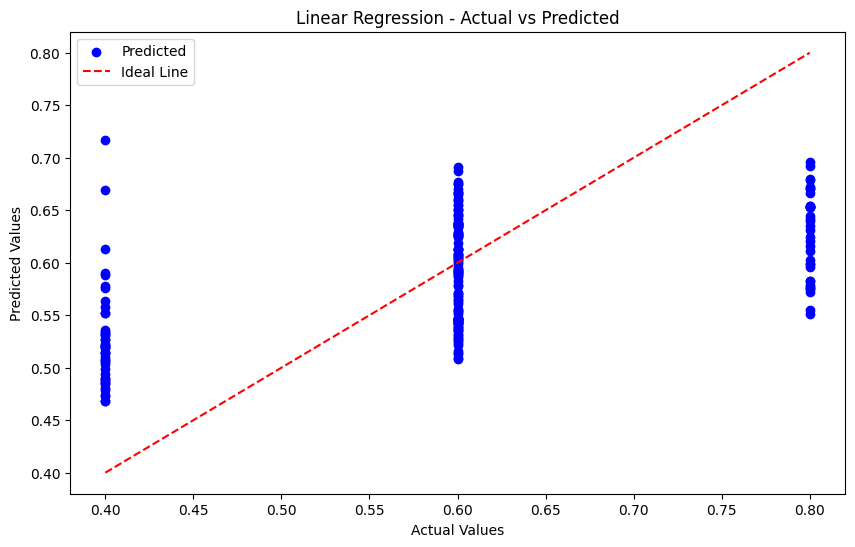

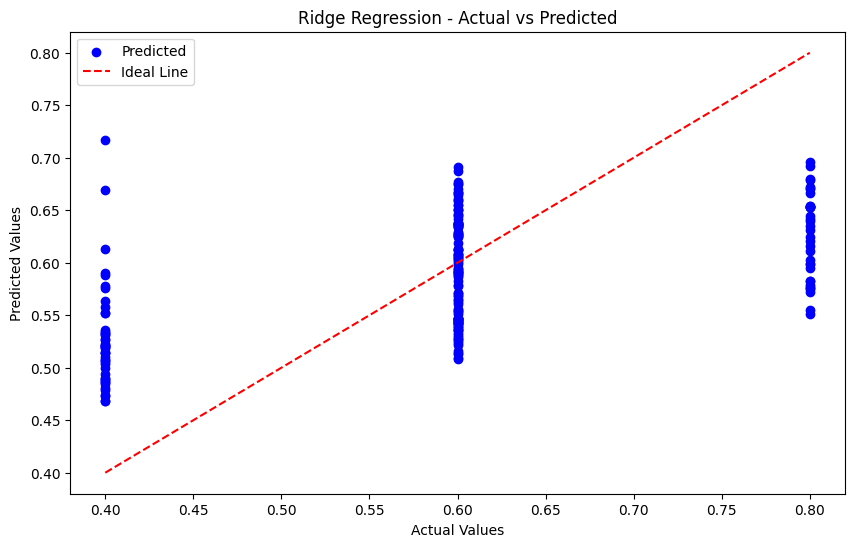

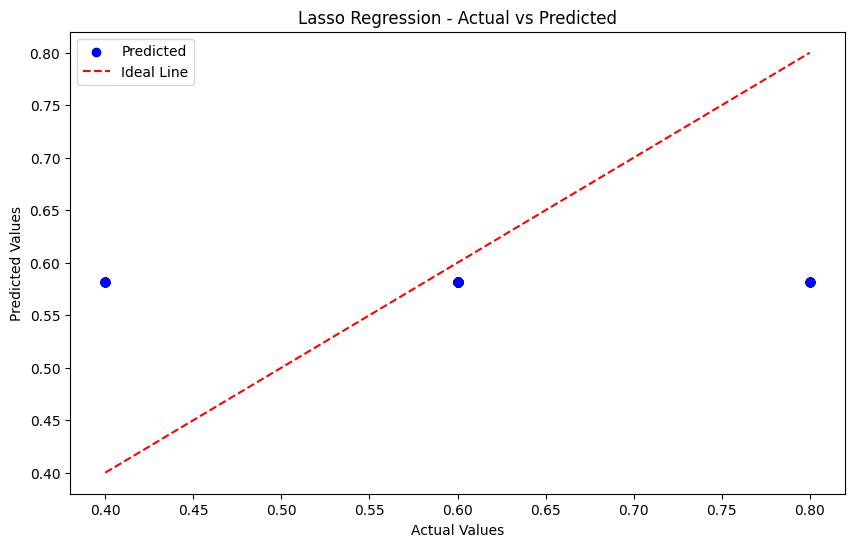

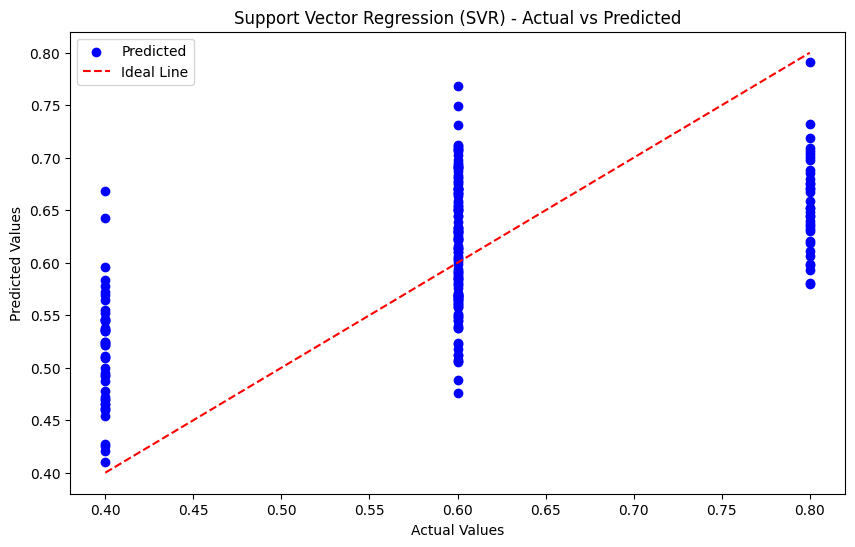

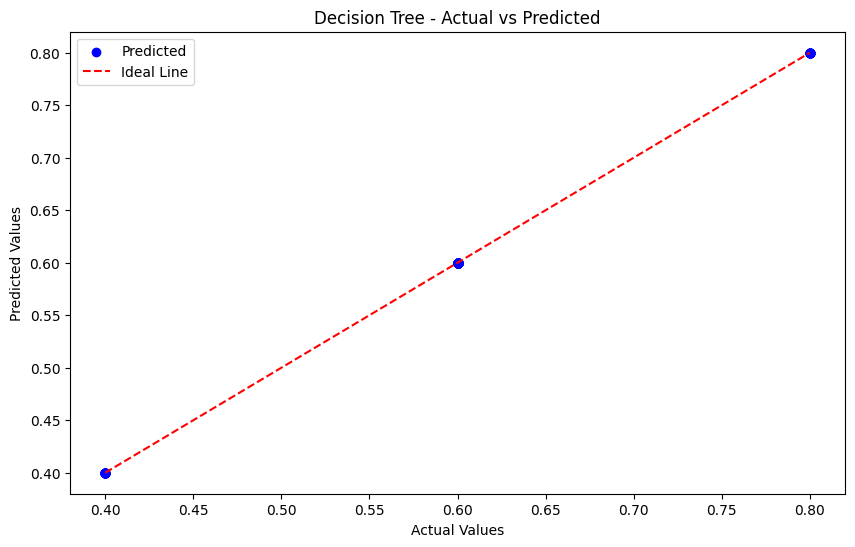

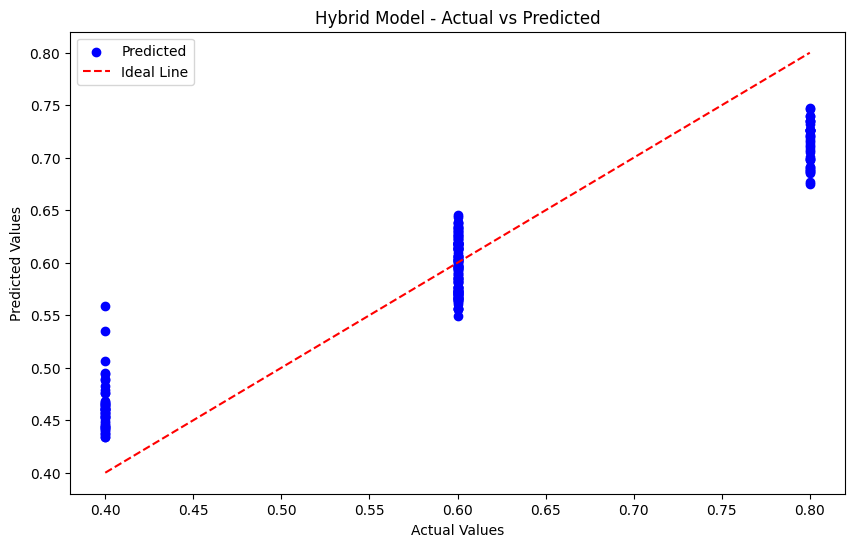

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Actual vs Predicted values plot
for name, metrics in results.items():
    y_pred = metrics['y_pred']
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{name} - Actual vs Predicted')
    plt.legend()
    plt.show()


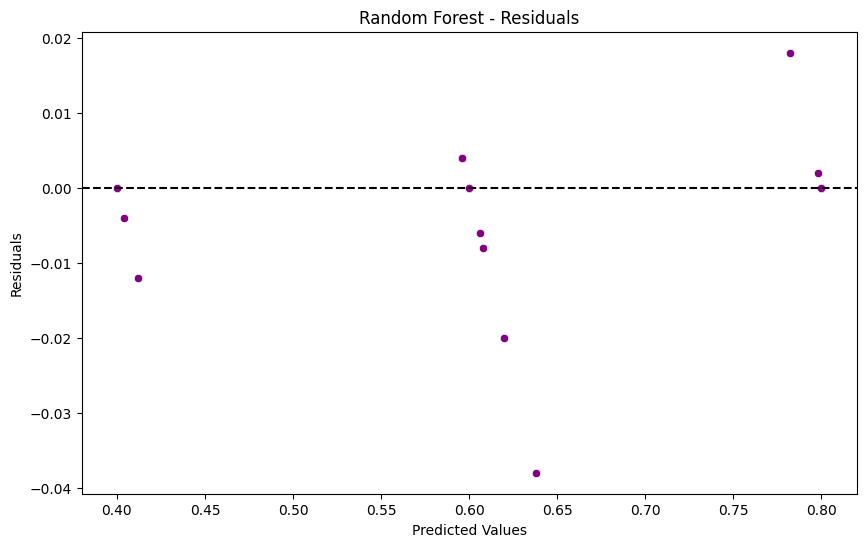

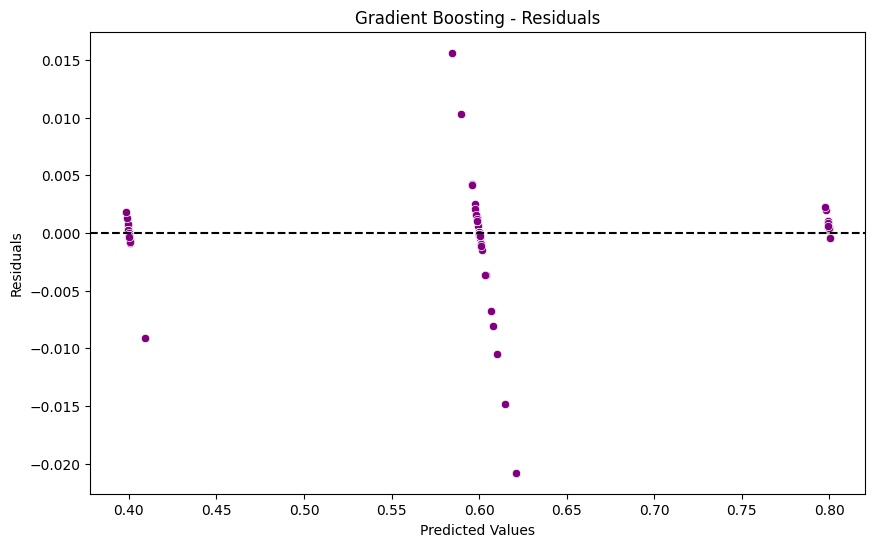

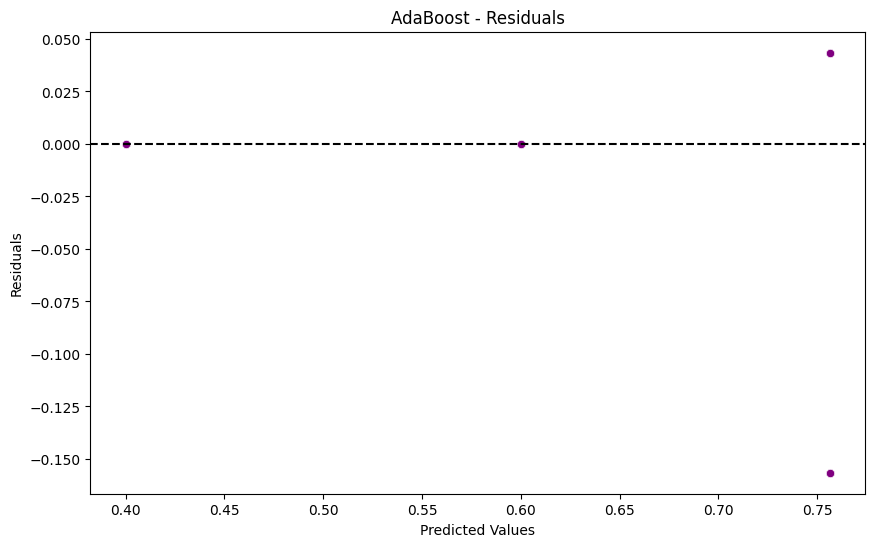

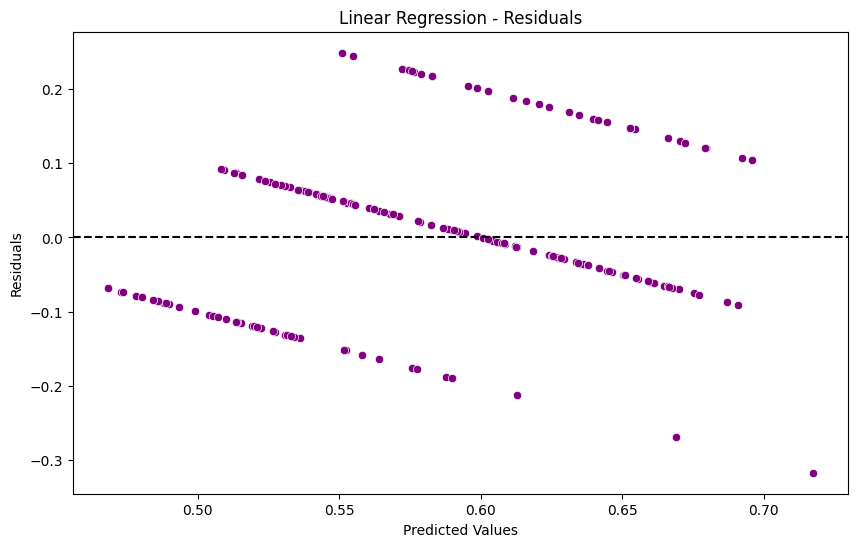

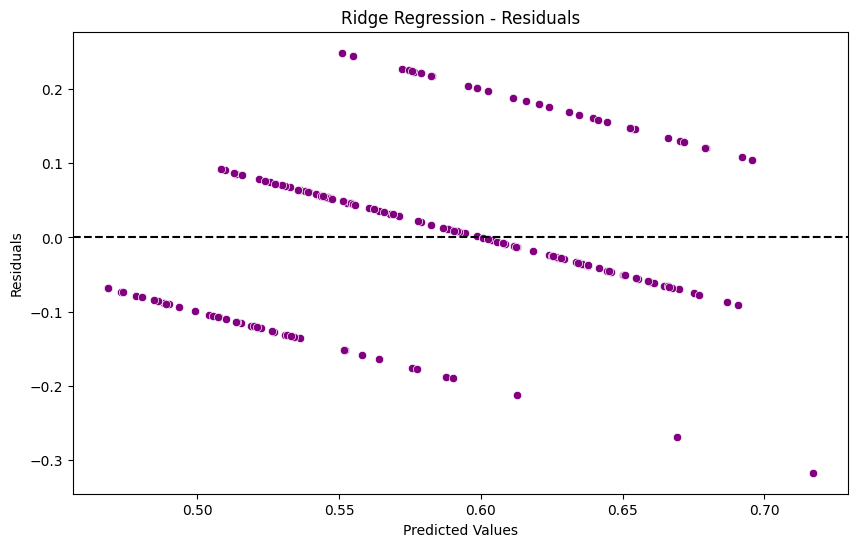

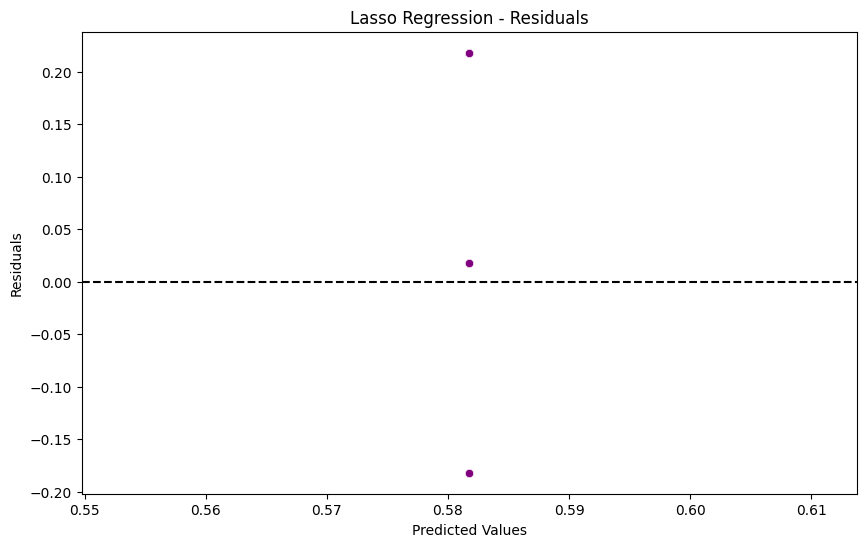

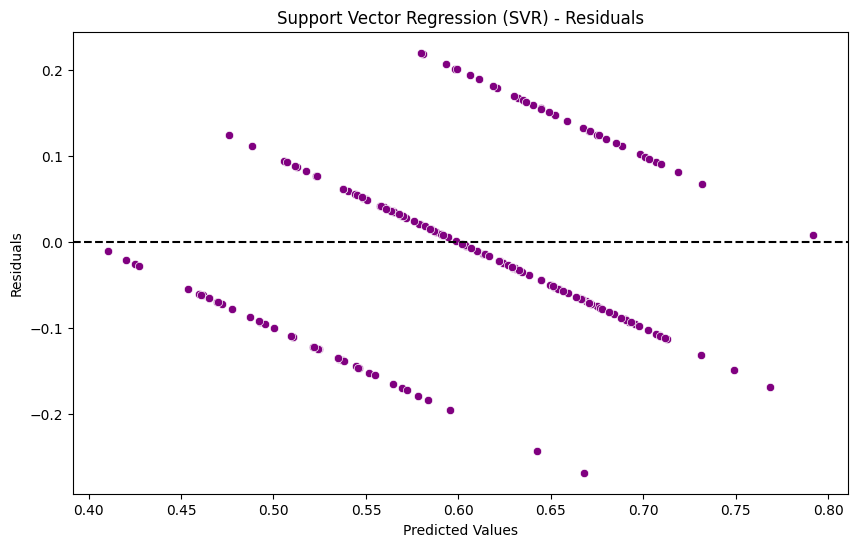

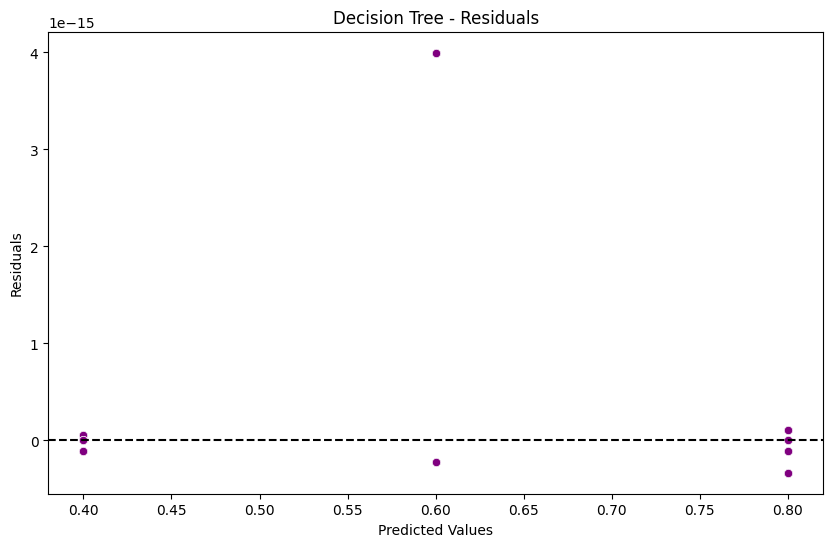

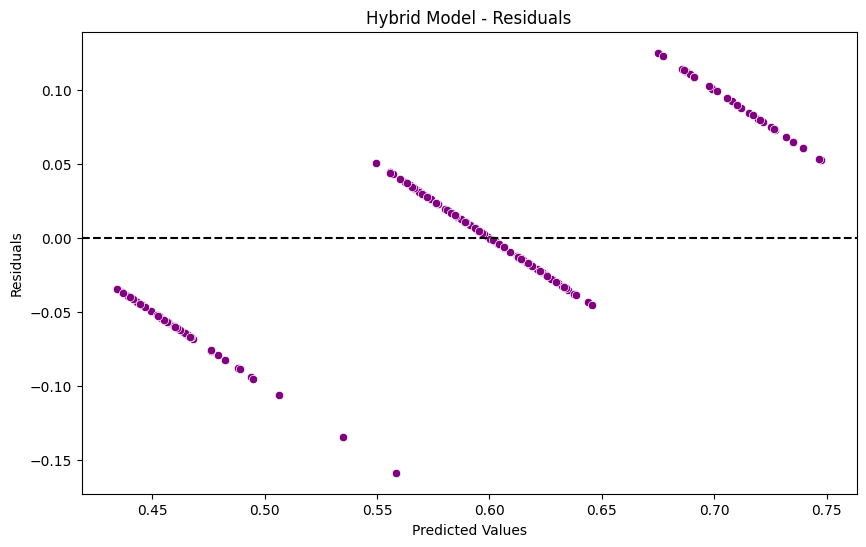

In [25]:
# Residuals plot (Predicted vs Residuals)
for name, metrics in results.items():
    y_pred = metrics['y_pred']
    residuals = y_test - y_pred
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, color='purple')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{name} - Residuals')
    plt.show()

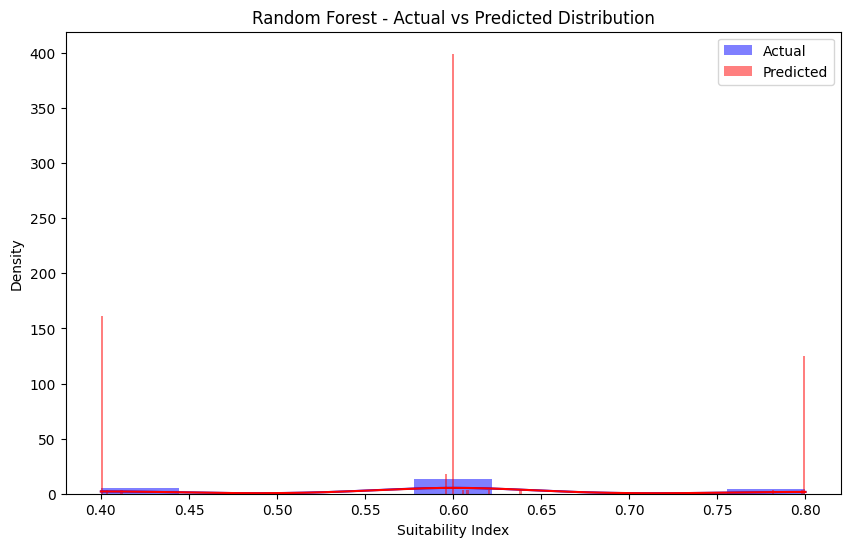

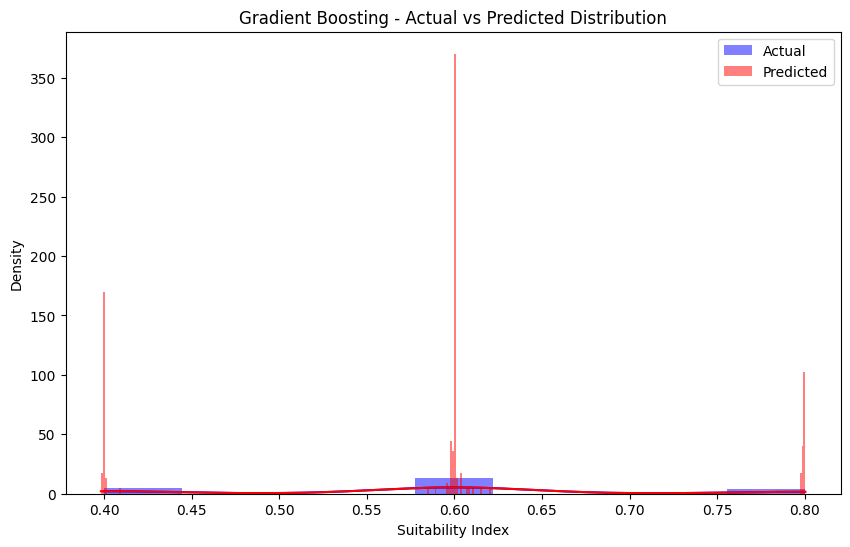

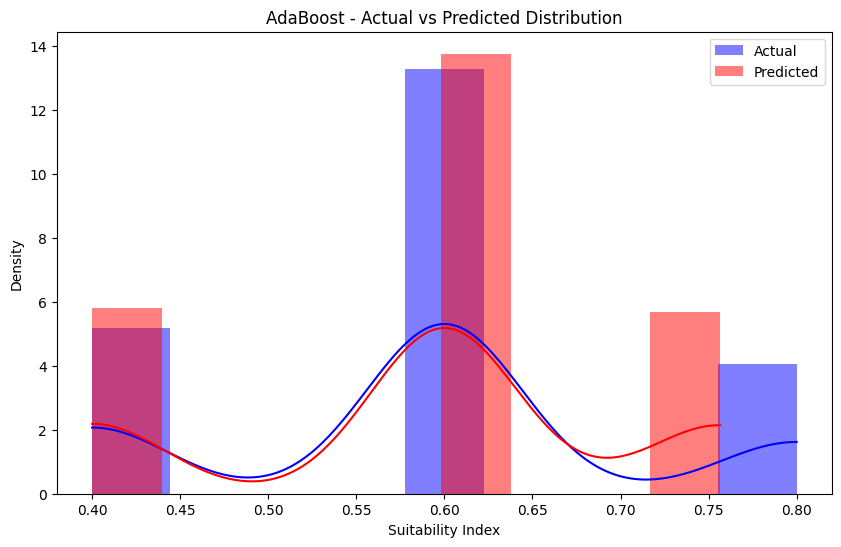

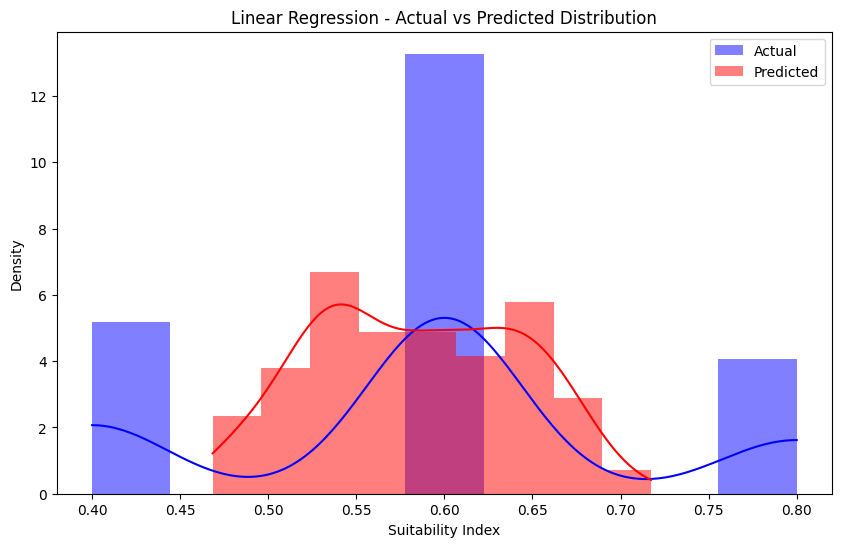

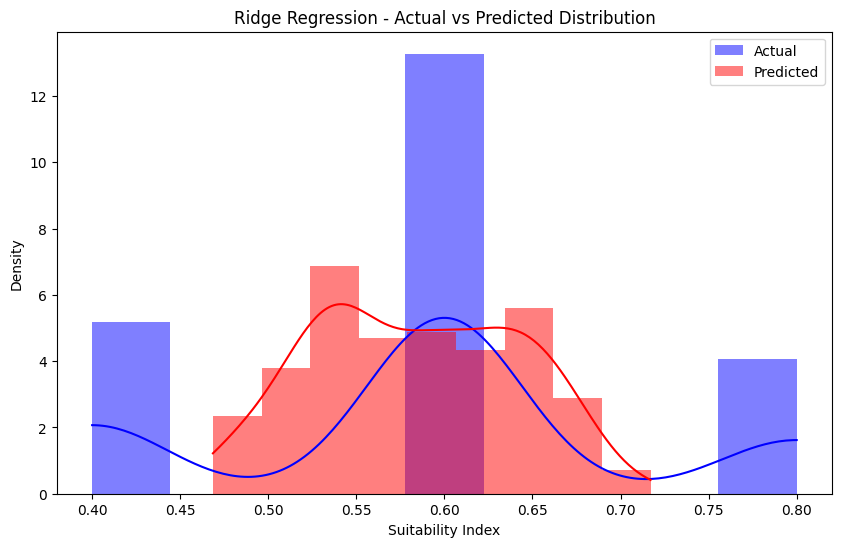

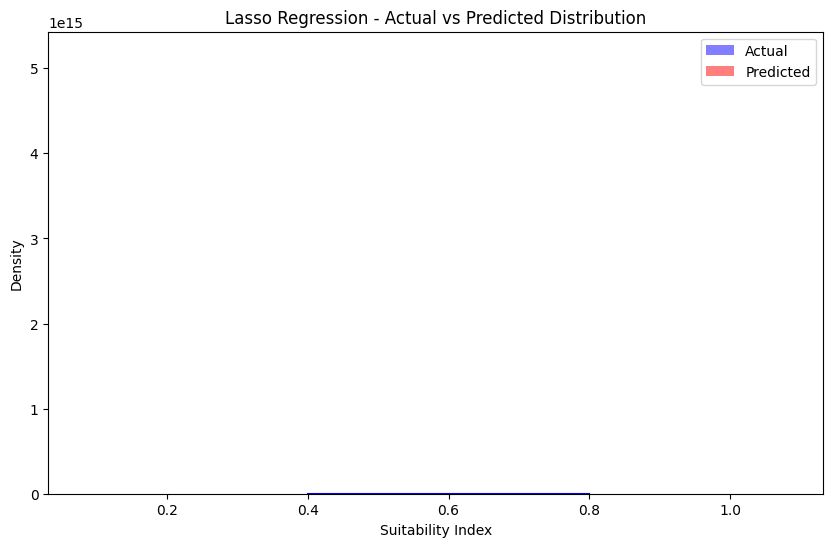

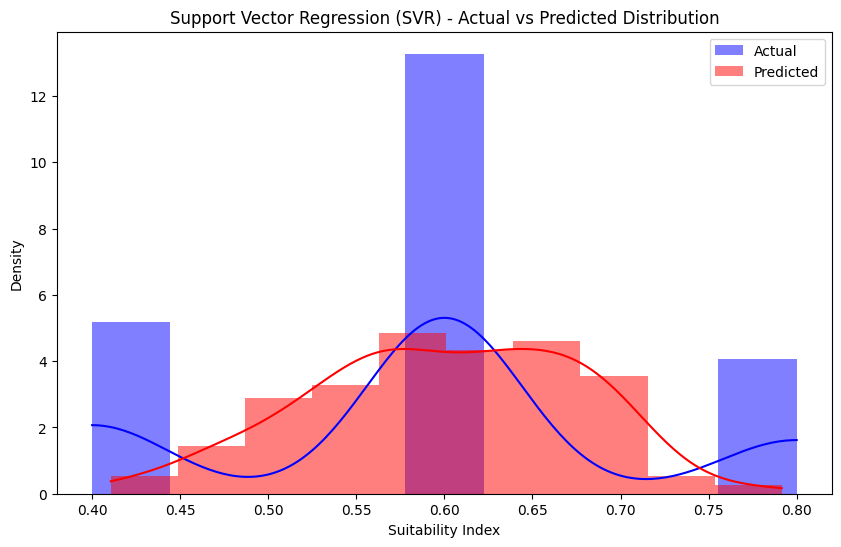

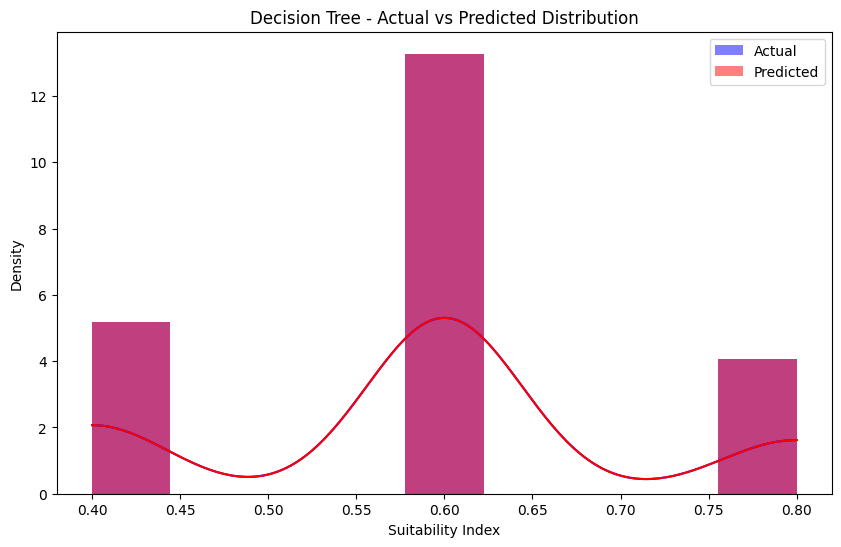

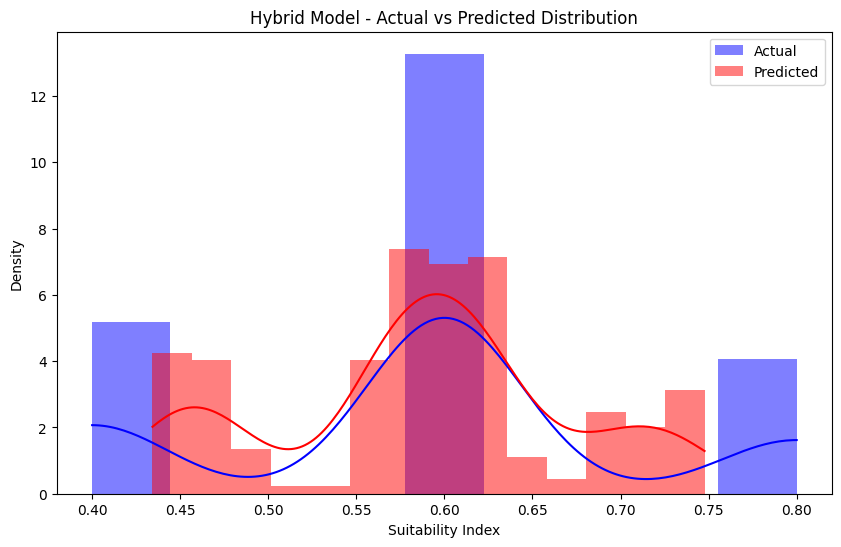

In [26]:

# Prediction Distribution (Actual vs Predicted)
for name, metrics in results.items():
    y_pred = metrics['y_pred']
    
    plt.figure(figsize=(10, 6))
    sns.histplot(y_test, kde=True, color='blue', label='Actual', stat='density', linewidth=0)
    sns.histplot(y_pred, kde=True, color='red', label='Predicted', stat='density', linewidth=0)
    plt.xlabel('Suitability Index')
    plt.title(f'{name} - Actual vs Predicted Distribution')
    plt.legend()
    plt.show()

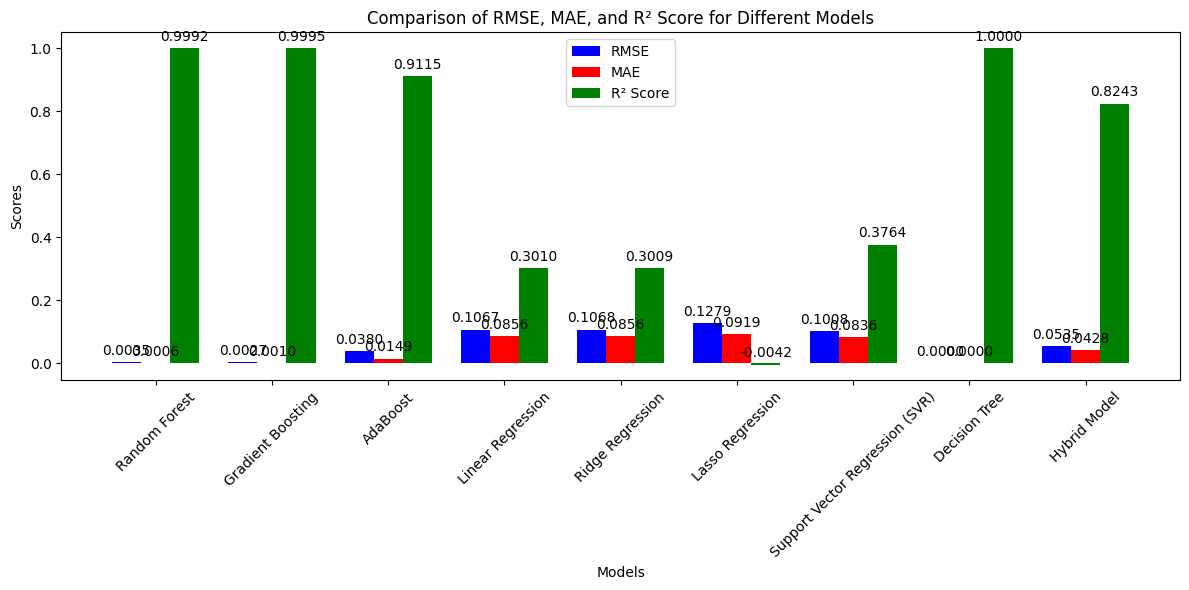

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for RMSE, MAE, and R² comparison
model_names = list(results.keys())
rmse_values = [metrics['RMSE'] for metrics in results.values()]
mae_values = [metrics['MAE'] for metrics in results.values()]
r2_values = [metrics['R2 Score'] for metrics in results.values()]

# Set the positions of the bars
x = np.arange(len(model_names))  # the label locations
width = 0.25  # the width of the bars (smaller for 3 bars)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, rmse_values, width, label='RMSE', color='b')
rects2 = ax.bar(x, mae_values, width, label='MAE', color='r')
rects3 = ax.bar(x + width, r2_values, width, label='R² Score', color='g')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of RMSE, MAE, and R² Score for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

# Display the values on top of the bars
def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(rects1)
add_values(rects2)
add_values(rects3)

# Show the plot
plt.tight_layout()
plt.show()
